<a href="https://colab.research.google.com/github/leswlz/Data-Analysis-with-Python/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
import numpy as np

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    sr1 = pd.Series([int(i) for i in range(1880, 2051)])
    recent = df[df['Year'] >= 2000]
    year_to_2050_2 = pd.Series([int(i) for i in range(2000, 2051)])
    recent['Year'].append(year_to_2050_2, ignore_index = True)

    # Use matplotlib to create a scatter plot using the "Year" column as the x-axis 
    # and the "CSIRO Adjusted Sea Level" column as the y-axix.
    df.plot.scatter('Year', 'CSIRO Adjusted Sea Level', label = 'original data', figsize = (12, 7))

    # Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
    # Plot the line of best fit over the top of the scatter plot. 
    # Make the line go through the year 2050 to predict the sea level rise in 2050.
    year_to_2050 = pd.Series([int(i) for i in range(1880, 2051)])
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    plt.plot(year_to_2050, intercept + slope * year_to_2050, 'r', label = 'best fit')

    # Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 
    # Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
    recent = df[df['Year'] >= 2000]
    slope_y, intercept_y, r_y, p_y, std_err_y = stats.linregress(recent['Year'], recent['CSIRO Adjusted Sea Level'])
    year_to_2050_2 = pd.Series([int(i) for i in range(2000, 2051)])

    plt.plot(year_to_2050_2, intercept_y + slope_y * year_to_2050_2, 'g', label = '>year 2000')

    # The x label should be "Year", the y label should be "Sea Level (inches)", 
    # and the title should be "Rise in Sea Level".
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")
    plt.legend(fontsize = "medium")

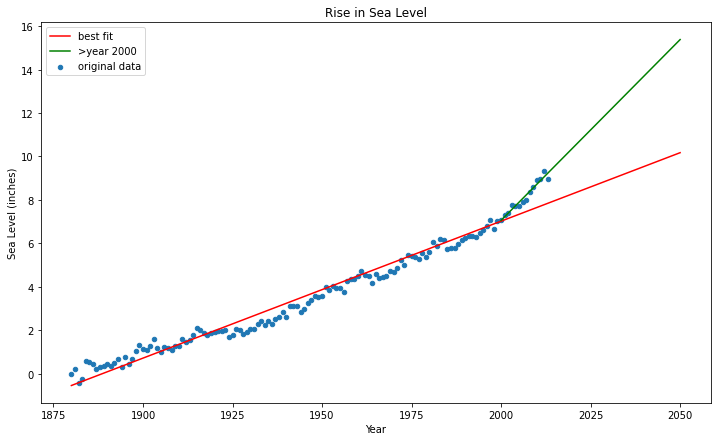

In [94]:
draw_plot()